<a href="https://colab.research.google.com/github/rodrigoamorteguiaros/Uniandes---Analytics/blob/master/E20_NeuralNetworksKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E20- Neural Networks in Keras 

Use keras framework to solve the below exercises.
Usa el framework keras para resolver los siguientes ejercicios.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

## 20.1 Predicting Student Admissions with Neural Networks

In this notebook, we predict student admissions to graduate schools based on six pieces of data:

1. GRE Scores (Test)
2. TOEFL Scores (Test)
3. University Ranking (1-5)
4. Statement of Purpose (SOP) and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA Scores (Grades)
6. Research Experience ( either 0 or 1 )

**Exercise:** Design and train a shallow neural network to predict the chance of Admission for each entry. Choose the number of hidden layer and neurons that minimizes the error. 

In [3]:
# Import dataset

data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [0]:
X = data.drop(data.columns[-1], axis=1)
Y = pd.DataFrame(data[data.columns[-1]])

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=22)

In [7]:
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

# Se estandarizan los valores de X
X_train = np.array(pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index))
X_test = np.array(pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index))

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [0]:
#!pip install livelossplot

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K

In [14]:
K.clear_session()
print("Building model...")
dims = X_train.shape[1]
print('Model variables: ', dims)
output_var = 1

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

print(model.summary())

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(X_train, Y_train, verbose=2,epochs=15)

Building model...
Model variables:  7
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
 - 0s - loss: 0.6382
Epoch 2/15
 - 0s - loss: 0.4279
Epoch 3/15
 - 0s - loss: 0.2977
Epoch 4/15
 - 0s - loss: 0.2110
Epoch 5/15
 - 0s - loss: 0.1527
Epoch 6/15
 - 0s - loss: 0.1128
Epoch 7/15
 - 0s - loss: 0.0853
Epoch 8/15
 - 0s - loss: 0.0661
Epoch 9/15
 - 0s - loss: 0.0526
Epoch 10/15
 - 0s - loss: 0.0424
Epoch 11/15
 - 0s - loss: 0.0351
Epoch 12/15
 - 0s - loss: 0.0296
Epoch 13/15
 - 0s - loss: 0.0254
Epoch 14/15
 - 0s - loss: 0.0221
Epoch 15/15
 - 0s - loss: 0.0195


In [0]:
import keras.optimizers as opts

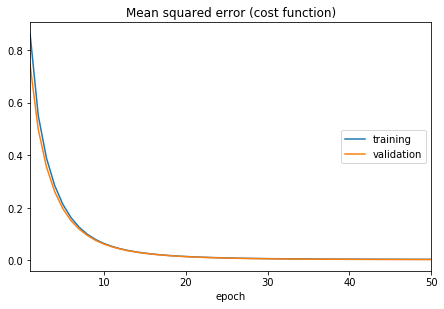

Mean squared error (cost function):
training   (min:    0.004, max:    0.863, cur:    0.004)
validation (min:    0.003, max:    0.745, cur:    0.003)


In [19]:
K.clear_session()
learning_rate = 0.01

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

op = opts.SGD(lr=learning_rate)

model.compile(loss = 'mean_squared_error',
              optimizer = op)

model.fit(X_train, Y_train,
          verbose=1, 
          epochs=50, 
          validation_data=[X_test,Y_test],
          callbacks=[PlotLossesKeras()])

# 20.2 Decision Boundary --  Moons Dataset 

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

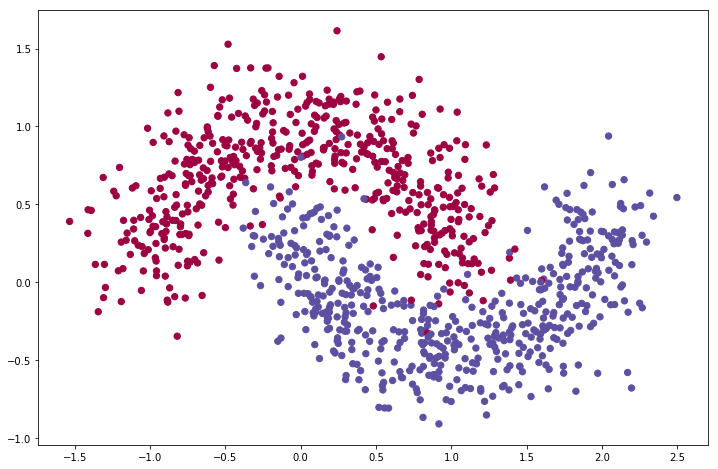

In [20]:
# Create moons dataset.

from sklearn.datasets.samples_generator import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

In [28]:
X,y = x_train, y_train

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3, random_state=22)

K.clear_session()
print("Building model...")

print('Model variables: ', dims)
dims = X_train.shape[1]
model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

print(model.summary())

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(X_train, Y_train, verbose=2,epochs=15)

Building model...
Model variables:  7
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
 - 0s - loss: 0.6688
Epoch 2/15
 - 0s - loss: 0.4014
Epoch 3/15
 - 0s - loss: 0.2625
Epoch 4/15
 - 0s - loss: 0.1882
Epoch 5/15
 - 0s - loss: 0.1482
Epoch 6/15
 - 0s - loss: 0.1262
Epoch 7/15
 - 0s - loss: 0.1140
Epoch 8/15
 - 0s - loss: 0.1071
Epoch 9/15
 - 0s - loss: 0.1032
Epoch 10/15
 - 0s - loss: 0.1008
Epoch 11/15
 - 0s - loss: 0.0992
Epoch 12/15
 - 0s - loss: 0.0983
Epoch 13/15
 - 0s - loss: 0.0977
Epoch 14/15
 - 0s - loss: 0.0972
Epoch 15/15
 - 0s - loss: 0.0968


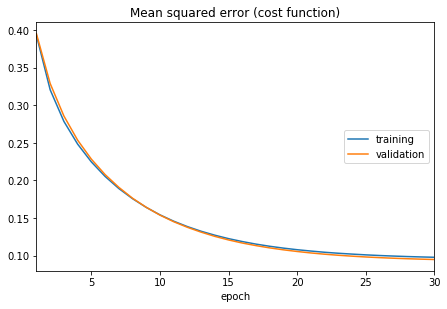

Mean squared error (cost function):
training   (min:    0.098, max:    0.393, cur:    0.098)
validation (min:    0.095, max:    0.395, cur:    0.095)


In [37]:
import keras.optimizers as opts

K.clear_session()
print("Building model...")

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

op = opts.SGD(lr=learning_rate)

model.compile(loss = 'mean_squared_error',
              optimizer = op)

model.fit(X_train, Y_train,
          verbose=1, 
          epochs=30, 
          validation_data=[X_test,Y_test],
          callbacks=[PlotLossesKeras()])